In [ ]:
nested_code = """
function A(x, y)              % Main function
B(x,y)
D(y)

   function B(x,y)            % Nested in A
   C(x)
   D(y)

      function C(x)           % Nested in B
      D(x)
      end
   end

   function D(x)              % Nested in A
   E(x)

      function E(x)           % Nested in D
      disp(x)
      end
   end
end
"""

In [ ]:
import subprocess
import constants as c

In [ ]:
with open("temp_file.m", 'w') as temp_file:
    temp_file.write(nested_code)

subprocess.Popen([c.NODE, c.TEXTMATE_SCRIPT, "temp_file.m", "output_file.csv"])

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
dataframe = pd.read_csv("output_file.csv", sep=str("_,_")).fillna("")
dataframe = dataframe.sort_values(by=["line", "start"])
dataframe.to_csv("output_file_1.csv", index=False)

In [ ]:
from numpy import gcd
import re

start = dataframe[dataframe['start'] == 0]
ident = start[start['token'].apply(str.isspace)]
gcd.reduce(ident['end'])

In [ ]:
dataframe = pd.read_csv("output_file_1.csv")
dataframe[dataframe['line'] < 10]

In [ ]:
dataframe[['start', 'token']]

In [ ]:
import token_to_image as ti

ident = 3
dataframe['rgb'] = dataframe['scopes'].apply(lambda x: ti.getHighlight(x))
dataframe['pixel_size'] = dataframe[['start', 'token']].apply(lambda row: len(row['token'])//ident if row['start'] == 0 and row['token'].isspace() else 1, axis=1)
dataframe['position'] = dataframe.groupby('line')['pixel_size'].cumsum() - dataframe['pixel_size']
dataframe.to_csv('ident_try.csv')

In [ ]:
from itertools import product

for i, j in product(range(3), range(4)):
    print(i,j)

In [ ]:
array = 3
array == 4 or print(3)

In [ ]:
dataframe[dataframe.apply(lambda x: (x['start'] != 0 and x['token'].isspace()) or len(x["token"]) == 0, axis=1)]

In [ ]:
dataframe[dataframe.apply(lambda x: len(x["token"]) > 0 and (x['start'] == 0 or not x['token'].isspace()), axis=1)]

In [ ]:
def _remove_empty_lines(dataframe):
    return dataframe[dataframe["token"].str.len() > 0]

_remove_empty_lines(dataframe)

In [15]:
import pandas as pd
dataframe = pd.read_csv("output_file.csv", sep=str("_,_")).fillna("")
dataframe = dataframe.sort_values(by=["line", "start"])
dataframe.to_csv("output_file_1.csv", index=False)

c:\Users\WilliamCosta\Documents\bolsas\everypiece\env\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ValueError: operands could not be broadcast together with shapes (65,) (3,) (65,) 

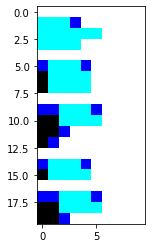

In [28]:
import syntax_higlight as sh
import numpy as np
import matplotlib.pyplot as plt

df1 = sh.syntax_highlight(dataframe)
df1.to_csv("result.csv", index=False)

df1 = df1[np.logical_and(df1['line'] < 20, df1['position'] < 10)]

def fillArray(row):
    global array
    array[row['line'], row['position']:row['position'] +
          row['pixel_size'], :] = row['color_code']

array = np.ones((20,10,3))*255
df1.apply(fillArray, axis=1)
plt.imshow(array)
empty_lines = 